# <center>Transfer Pathway Analyses at the University of Arizona</center>

## Introduction
In this notebook we consider a few of the transfer pathways from community colleges in the State of Arizona to bachelor's degree programs at the University of Arizona. Repeating the analyses provided here, other transfer pathways can easily be considered. Each analysis considers curriculum-based metrics on either side of the institutional boundary articulated in the transfer plan, as well as a comparion of the transfer (2-year-to-4-year) pathway versus the 4-year pathway that does not involve transfer articulation. 

The following Julia programming language packages are used in this notebook:

In [1]:
using CurricularAnalytics, CurricularVisualization
using CurricularOptimization # add git@github.com:CurricularAnalytics/CurricularOptimization.jl.git
using DataFrames
using StatsBase
using Plots
using StatsPlots
using CSV
using LaTeXStrings
using LightGraphs # remove this after new functions are added to toolbox

WebIO._IJuliaInit()

## Pima CC-to-University of Arizona Transfer Pathways 
Let us first consider the completion pathways for the two populations of students involved in this study, transfer student and non-transfer students. In order to highlight the issues involved in this work, we have selected a few programs that have a high degree of curricular complexity. 

Consider first the Chemical Engineering program at the University of Arizona for non-transfer students:

In [2]:
ChemE = read_csv("./programs/UArizona-ChemE.csv");
visualize(ChemE, notebook=true, scale=0.85)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Chemical Engineering\",\"dp_name\":\"2019-20 Degree Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 125\",\"metrics\":{\"centrality\":0,\"complexity\":37.0,\"blocking factor\":26,\"delay factor\":11.0},\"nameSub\":\"Calculus I w/ Applications\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHEM 151\",\"metrics\":{\"centrality\":0,\"complexity\":31.0,\"blocking factor\":21,\"delay factor\":10.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 101\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"First-year Comp\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":4,\"type\":\"CurriculumCorequisite\"}],\"name\":\"ENGR 102\",\"metrics\":{\"centrality\":163,\"complexity\":25.0,\"blocking factor\":15,\"delay factor\":10.0},\"nameSub\":\"Intro to Engineering\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":6,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 129\",\"metrics\":{\"centrality\":156,\"complexity\":26.0,\"blocking factor\":17,\"delay factor\":9.0},\"nameSub\":\"Calculus II\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"CHEM 152\",\"metrics\":{\"centrality\":171,\"complexity\":28.0,\"blocking factor\":18,\"delay factor\":10.0},\"nameSub\":\"Gen Chemistry II\",\"id\":7,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHYS 141\",\"metrics\":{\"centrality\":115,\"complexity\":25.0,\"blocking factor\":16,\"delay factor\":9.0},\"nameSub\":\"Intro Mechanics\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ENGL 102\",\"metrics\":{\"centrality\":0,\"complexity\":2.0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":10,\"type\":\"CurriculumCorequisite\"}],\"name\":\"AME 105\",\"metrics\":{\"centrality\":393,\"complexity\":28.0,\"blocking factor\":17,\"delay factor\":11.0},\"nameSub\":\"Intro to MATLAB I\",\"id\":10,\"credits\":1,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":11,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":47,\"target_id\":11,\"type\":\"CurriculumCorequisite\"},{\"source_id\":7,\"target_id\":11,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":10,\"target_id\":11,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":1,\"target_id\":11,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"CHEE 201\",\"metrics\":{\"centrality\":815,\"complexity\":25.0,\"blocking factor\":14,\"delay factor\":11.0},\"nameSub\":\"Elements of Chem and Envirn Eng I\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":10,\"target_id\":12,\"type\":\"CurriculumCorequisite\"},{\"source_id\":1,\"t

### Analysis of the Curriculum
Using the `basic_metrics()` function we can analyze the curriculum provided to non-transfer students in the Chemical Engineering program at the University of Arizona.

In [3]:
ChemE_curric_metrics = basic_metrics(ChemE.curriculum)
println(String(take!(ChemE_curric_metrics)))


University of Arizona 
Curriculum: Chemical Engineering
  credit hours = 128
  number of courses = 46
  Blocking Factor --
    entire curriculum = 248
    max. value = 26, for course(s): MATH 125 - Calculus I w/ Applications
  Centrality --
    entire curriculum = 6870
    max. value = 815, for course(s): CHEE 201 - Elements of Chem and Envirn Eng I
  Delay Factor --
    entire curriculum = 301.0
    max. value = 11.0, for course(s): MATH 125 - Calculus I w/ Applications, AME 105 - Intro to MATLAB I, CHEE 201 - Elements of Chem and Envirn Eng I, CHEE 203 - Chem Eng Heat Xfer & Fluid Flow, CHEE 303 - Chem Eng Mass Xfer, CHEE 402 - Chem Eng Modeling, CHEE 301A - Chem Eng Lab I, CHEE 305 - Chem Eng Transport Phenom, CHEE 301B - Chem Eng Lab II, CHEE 401A - Chem and Enviorn Eng Lab I, CHEE 401B - Process Dynamics and Control Lab, AME 205 - Intro to MATLAB II
  Complexity --
    entire curriculum = 549.0
    max. value = 37.0, for course(s): MATH 125 - Calculus I w/ Applications
  Longest 

**Curricular Complexity.** A number of items stand out in this analysis. First, the overall complexity of the curriculum, 549, is quite high, even for a STEM-based curriculum. Students attempting to complete curricula with this level of complexity tend to have difficulty completing them on time.

**Gateway Course.** Next, notice that the there are two long pathways of requisites in this curriculum, and that both have Calculus I as the first course in the sequence. Thus, this course is likely the most important gateway course in this curriculum. Any delay in completing this course, or any lack of efficacy in attaining the course leanring outcomes will likely lead to a delay in completing this program on time (i.e, in four years).

In [4]:
ChemE_dp_metrics = basic_metrics(ChemE)
println(String(take!(ChemE_dp_metrics)))


Curriculum: Chemical Engineering
Degree Plan: 2019-20 Degree Plan
  total credit hours = 128
  number of terms = 8
  max. credits in a term = 17, in term 4
  min. credits in a term = 15, in term 2
  avg. credits per term = 16.0, with std. dev. = 0.5



Next, we will create a transfer plan that involves starting at a community college, earning the associate of science degree (with a pre-engineering concentration) in the first two years at Pima Community College, and then completing the Chemical Engineering bachelor's degree at the University of Arizona.  In the degree plan provided below, the first four terms are taken at Pima Community College, and the last five terms are taken at the University of Arizona.

In [5]:
ChemE_xfer = read_csv("./programs/Pima-UArizona-ChemE.csv");
visualize(ChemE_xfer, notebook=true, edit=true, scale=0.85)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":true},\"curriculum\":{\"name\":\"Chemical Engineering\",\"dp_name\":\"2019-20 Pima to UA Transfer Degree Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MAT 220\",\"metrics\":{\"centrality\":0,\"complexity\":36.0,\"blocking factor\":26,\"delay factor\":10.0},\"nameSub\":\"Calculus I\",\"id\":1,\"credits\":5,\"nameCanonical\":\"Calculus I\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":2,\"type\":\"CurriculumStrictCorequisite\"}],\"name\":\"CHM 151IN\",\"metrics\":{\"centrality\":291,\"complexity\":30.0,\"blocking factor\":20,\"delay factor\":10.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"General Chemsitry I\"},{\"curriculum_requisites\":[],\"name\":\"CHM 151RC\",\"metrics\":{\"centrality\":0,\"complexity\":31.0,\"blocking factor\":21,\"delay factor\":10.0},\"nameSub\":\"Gen Chemistry I Recitation\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"WRT 101\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"English Composition I\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":5,\"type\":\"CurriculumCorequisite\"}],\"name\":\"ENG 102IN\",\"metrics\":{\"centrality\":203,\"complexity\":24.0,\"blocking factor\":15,\"delay factor\":9.0},\"nameSub\":\"Problem-Solving and Engineering Design\",\"id\":5,\"credits\":3,\"nameCanonical\":\"Intro to Engineering\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"AGEC-S Course\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MAT 231\",\"metrics\":{\"centrality\":182,\"complexity\":24.0,\"blocking factor\":16,\"delay factor\":8.0},\"nameSub\":\"Calculus II\",\"id\":7,\"credits\":4,\"nameCanonical\":\"Calculus II\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":9,\"target_id\":8,\"type\":\"CurriculumStrictCorequisite\"}],\"name\":\"CHM 152IN\",\"metrics\":{\"centrality\":443,\"complexity\":27.0,\"blocking factor\":17,\"delay factor\":10.0},\"nameSub\":\"Gen Chemistry II\",\"id\":8,\"credits\":4,\"nameCanonical\":\"General Chemsitry II\"},{\"curriculum_requisites\":[],\"name\":\"CHM 152RC\",\"metrics\":{\"centrality\":0,\"complexity\":27.0,\"blocking factor\":18,\"delay factor\":9.0},\"nameSub\":\"Gen Chemistry II Recitation\",\"id\":9,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":11,\"target_id\":10,\"type\":\"CurriculumStrictCorequisite\"},{\"source_id\":1,\"target_id\":10,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHY 210IN\",\"metrics\":{\"centrality\":272,\"complexity\":22.0,\"blocking factor\":14,\"delay factor\":8.0},\"nameSub\":\"Intro Mechanics\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"PHY 210RC\",\"metrics\":{\"centrality\":0,\"complexity\":23.0,\"blocking factor\":15,\"delay factor\":8.0},\"nameSub\":\"Intro Mechanics Recitation\",\"id\":11,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"WRT 102\",\"metrics\":{\"centrality\":0,\"complexity\":2.0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\" English Composition II\",\"id\":12,\"credits\":3,\"nameCanonical\":\" 

In [6]:
isvalid_curriculum(ChemE_xfer.curriculum)

true

In [7]:
errors = IOBuffer()
isvalid_degree_plan(ChemE_xfer, errors)

true

In [8]:
ChemE_xfer_curric_metrics = basic_metrics(ChemE_xfer.curriculum)
println(String(take!(ChemE_xfer_curric_metrics)))


University of Arizona 
Curriculum: Chemical Engineering
  credit hours = 138
  number of courses = 51
  Blocking Factor --
    entire curriculum = 315
    max. value = 26, for course(s): MAT 220 - Calculus I
  Centrality --
    entire curriculum = 10564
    max. value = 1278, for course(s): CHEE 301B - Chem Eng Lab II
  Delay Factor --
    entire curriculum = 327.0
    max. value = 10.0, for course(s): MAT 220 - Calculus I, CHM 151IN - Gen Chemistry I, CHM 151RC - Gen Chemistry I Recitation, CHM 152IN - Gen Chemistry II, ENG 105IN - Intro to MATLAB I, ENG 205IN - Intro to MATLAB II, CHEE 201 - Elements of Chem and Envirn Eng I, CHEE 202 - Elements of Chem Eng II, CHEE 203 - Chem Eng Heat Xfer & Fluid Flow, CHEE 303 - Chem Eng Mass Xfer, CHEE 402 - Chem Eng Modeling, CHEE 301A - Chem Eng Lab I, CHEE 305 - Chem Eng Transport Phenom, CHEE 301B - Chem Eng Lab II, CHEE 401A - Chem and Enviorn Eng Lab I, CHEE 401B - Process Dynamics and Control Lab
  Complexity --
    entire curriculum = 64

In [9]:
ChemE_xfer_dp_metrics = basic_metrics(ChemE_xfer)
println(String(take!(ChemE_xfer_dp_metrics)))


Curriculum: Chemical Engineering
Degree Plan: 2019-20 Pima to UA Transfer Degree Plan
  total credit hours = 138
  number of terms = 10
  max. credits in a term = 20, in term 4
  min. credits in a term = 5, in term 10
  avg. credits per term = 13.8, with std. dev. = 5.035871324805669



In [10]:
PreEng = read_csv("./programs/Pima-PreEng.csv")
visualize(PreEng, notebook=true, scale=0.85)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Pre-Engineering (Chemical Eng. Concentration)\",\"dp_name\":\"2019-20 Pima Pre-Engineering\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MAT 220\",\"metrics\":{\"centrality\":0,\"complexity\":11.0,\"blocking factor\":8,\"delay factor\":3.0},\"nameSub\":\"Calculus I\",\"id\":1,\"credits\":5,\"nameCanonical\":\"Calculus I\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":2,\"type\":\"CurriculumStrictCorequisite\"}],\"name\":\"CHM 151IN\",\"metrics\":{\"centrality\":5,\"complexity\":8.0,\"blocking factor\":3,\"delay factor\":5.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"General Chemsitry I\"},{\"curriculum_requisites\":[],\"name\":\"CHM 151RC\",\"metrics\":{\"centrality\":0,\"complexity\":9.0,\"blocking factor\":4,\"delay factor\":5.0},\"nameSub\":\"Gen Chemistry I Recitation\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"WRT 101\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"English Composition I\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":5,\"type\":\"CurriculumCorequisite\"}],\"name\":\"ENG 102IN\",\"metrics\":{\"centrality\":0,\"complexity\":2.0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Problem-Solving and Engineering Design\",\"id\":5,\"credits\":3,\"nameCanonical\":\"Intro to Engineering\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"AGEC-S Course\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MAT 231\",\"metrics\":{\"centrality\":9,\"complexity\":6.0,\"blocking factor\":3,\"delay factor\":3.0},\"nameSub\":\"Calculus II\",\"id\":7,\"credits\":4,\"nameCanonical\":\"Calculus II\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":9,\"target_id\":8,\"type\":\"CurriculumStrictCorequisite\"}],\"name\":\"CHM 152IN\",\"metrics\":{\"centrality\":9,\"complexity\":7.0,\"blocking factor\":2,\"delay factor\":5.0},\"nameSub\":\"Gen Chemistry II\",\"id\":8,\"credits\":4,\"nameCanonical\":\"General Chemsitry II\"},{\"curriculum_requisites\":[],\"name\":\"CHM 152RC\",\"metrics\":{\"centrality\":0,\"complexity\":7.0,\"blocking factor\":3,\"delay factor\":4.0},\"nameSub\":\"Gen Chemistry II Recitation\",\"id\":9,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":11,\"target_id\":10,\"type\":\"CurriculumStrictCorequisite\"},{\"source_id\":1,\"target_id\":10,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHY 210IN\",\"metrics\":{\"centrality\":6,\"complexity\":4.0,\"blocking factor\":1,\"delay factor\":3.0},\"nameSub\":\"Intro Mechanics\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"PHY 210RC\",\"metrics\":{\"centrality\":0,\"complexity\":5.0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"Intro Mechanics Recitation\",\"id\":11,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"WRT 102\",\"metrics\":{\"centrality\":0,\"complexity\":2.0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\" English Composition II\",\"id\":12,\"credits\":3,\"nameCanonical\":\" English Composit

In [11]:
isvalid_curriculum(PreEng.curriculum)

true

In [12]:
PreEng_metrics = basic_metrics(PreEng.curriculum)
println(String(take!(PreEng_metrics)))


Pima Community College 
Curriculum: Pre-Engineering (Chemical Eng. Concentration)
  credit hours = 75
  number of courses = 27
  Blocking Factor --
    entire curriculum = 33
    max. value = 8, for course(s): MAT 220 - Calculus I
  Centrality --
    entire curriculum = 44
    max. value = 12, for course(s): 235IN - General Organic Chemistry I
  Delay Factor --
    entire curriculum = 75.0
    max. value = 5.0, for course(s): CHM 151IN - Gen Chemistry I, CHM 151RC - Gen Chemistry I Recitation, CHM 152IN - Gen Chemistry II, 235IN - General Organic Chemistry I, CHM 236IN - General Organic Chemistry II
  Complexity --
    entire curriculum = 108.0
    max. value = 11.0, for course(s): MAT 220 - Calculus I
  Longest Path(s) --
    length = 5, number of paths = 1
    path(s):
    path 1 = CHM 151RC - Gen Chemistry I Recitation -> CHM 151IN - Gen Chemistry I -> CHM 152IN - Gen Chemistry II -> 235IN - General Organic Chemistry I -> CHM 236IN - General Organic Chemistry II



In [13]:
ChemE_xfer_curric_metrics = basic_metrics(ChemE_xfer.curriculum)
println(String(take!(ChemE_xfer_curric_metrics)))


University of Arizona 
Curriculum: Chemical Engineering
  credit hours = 138
  number of courses = 51
  Blocking Factor --
    entire curriculum = 315
    max. value = 26, for course(s): MAT 220 - Calculus I
  Centrality --
    entire curriculum = 10564
    max. value = 1278, for course(s): CHEE 301B - Chem Eng Lab II
  Delay Factor --
    entire curriculum = 327.0
    max. value = 10.0, for course(s): MAT 220 - Calculus I, CHM 151IN - Gen Chemistry I, CHM 151RC - Gen Chemistry I Recitation, CHM 152IN - Gen Chemistry II, ENG 105IN - Intro to MATLAB I, ENG 205IN - Intro to MATLAB II, CHEE 201 - Elements of Chem and Envirn Eng I, CHEE 202 - Elements of Chem Eng II, CHEE 203 - Chem Eng Heat Xfer & Fluid Flow, CHEE 303 - Chem Eng Mass Xfer, CHEE 402 - Chem Eng Modeling, CHEE 301A - Chem Eng Lab I, CHEE 305 - Chem Eng Transport Phenom, CHEE 301B - Chem Eng Lab II, CHEE 401A - Chem and Enviorn Eng Lab I, CHEE 401B - Process Dynamics and Control Lab
  Complexity --
    entire curriculum = 64

In [14]:
ChemE_xfer_dp_metrics = basic_metrics(ChemE_xfer)
println(String(take!(ChemE_xfer_dp_metrics)))


Curriculum: Chemical Engineering
Degree Plan: 2019-20 Pima to UA Transfer Degree Plan
  total credit hours = 138
  number of terms = 10
  max. credits in a term = 20, in term 4
  min. credits in a term = 5, in term 10
  avg. credits per term = 13.8, with std. dev. = 5.035871324805669



### Term-by-term Complexity Accumulation
Below we consider how curricular complexity accumulates on a term-by-term basis for both non-transfer and transfer degree pathways. Courses having higher complexity are more important to complete earlier in any degree plan, as courses with high curricular complexity tend to be the most crucial courses in a curriculum. Thus, delaying the completion of high complexity courses can lead to a delay in graduation. The reason this is important to look at is because we have found that in some transfer degree plans, high complexity courses are pushed into latter terms, while student focus on completing general education core requirements. 

In [15]:
ChemE_complexity = complexity(ChemE.curriculum)
ChemE_xfer_complexity = complexity(ChemE_xfer.curriculum)
term_complexity = [0]; term_complexity_xfer = [0] 
sum = 0; sum_xfer = 0
for term in ChemE.terms
    for c in term.courses
        sum += c.metrics["complexity"]
    end
    push!(term_complexity,sum)
end 
for term in ChemE_xfer.terms
    for c in term.courses
        sum_xfer += c.metrics["complexity"]
    end
    push!(term_complexity_xfer,sum_xfer)
end

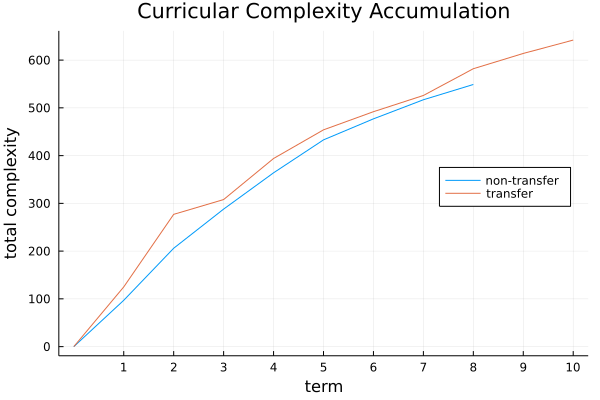

In [16]:
X1 = [i for i in 0:8]; Y1 = term_complexity
plot(X1, Y1, seriestype = :line, xlabel = "term", ylabel="total complexity", title="Curricular Complexity Accumulation", 
    xticks=1:1:10, label="non-transfer", legend=:right)
X2 = [i for i in 0:10]; Y2 = term_complexity_xfer
plot!(X2, Y2, seriestype = :line, label="transfer")

In the graph shown above, we see that for non-transfer students there is a fairly steady (i.e, almost linear) accumulation of curricular complexity from one term to the next. While in the transfer student plan, there is also a farily steady accumulation of complexity.  Given that the total complexity of the transfer program is greater than that of the non-tranfer program (a problem discussed above), the transfer line is always above the non-tranfer line; however, they both accumulate complexity at a similar rate.  

In [17]:
function edge_crossings(g::AbstractGraph{T}, s::Int, d::Array{Int,1}) where T
    total = 0
    for v in d
        has_edge(g, s, v) ? total += 1 : nothing
    end
    return total
end

function edge_crossings(g::AbstractGraph{T}, s::Array{Int,1}) where T
    total = 0
    d = convert(Array{Int,1}, vertices(g)) # collect the graph vertex ids in a integer array
    filter!(x->x ∉ s, d)  # remove the vertex ids in s from d
    for v in s
        total += edge_crossings(g, v, d)
    end
    return total
end

edge_crossings (generic function with 2 methods)

In [18]:
function knowledge_transfer(dp::DegreePlan)
    ec_terms = []
    s = Array{Int64,1}()
    for term in dp.terms
        sum = 0
        for c in term.courses
            push!(s, c.vertex_id[dp.curriculum.id])
        end
        sum += edge_crossings(dp.curriculum.graph, s)
        push!(ec_terms, sum)
    end
    return deleteat!(ec_terms, lastindex(ec_terms))
end

knowledge_transfer (generic function with 1 method)

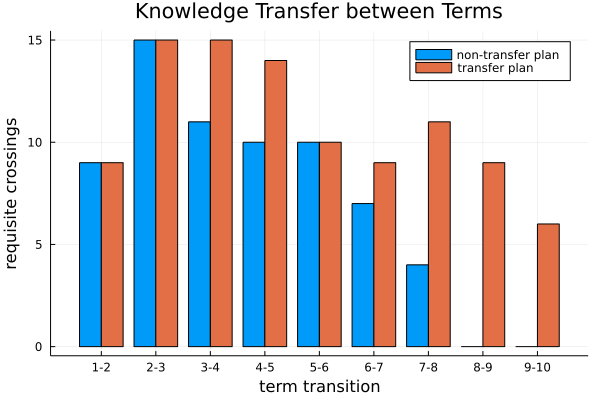

In [19]:
X = repeat(["$(i-1)-$(i)" for i in 2:10], outer=2)
Y = convert(Array{Int}, cat(knowledge_transfer(ChemE), [0,0], knowledge_transfer(ChemE_xfer), dims=1))
student_type = repeat(["non-transfer plan", "transfer plan"], inner=9)

groupedbar(X, Y, group=student_type, xlabel="term transition", ylabel="requisite crossings", 
           title = "Knowledge Transfer between Terms")

In [20]:
curric = ChemE.curriculum
dp = optimize_plan(curric, 8, 12, 20, [balance_obj])
visualize(dp, notebook=true)

Academic license - for non-commercial use only
An optimal solution was found with objective value = 0.0


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Chemical Engineering\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":4,\"type\":\"CurriculumCorequisite\"}],\"name\":\"ENGR 102\",\"metrics\":{\"centrality\":163,\"complexity\":25.0,\"blocking factor\":15,\"delay factor\":10.0},\"nameSub\":\"Intro to Engineering\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"MATH 125\",\"metrics\":{\"centrality\":0,\"complexity\":37.0,\"blocking factor\":26,\"delay factor\":11.0},\"nameSub\":\"Calculus I w/ Applications\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 101\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"First-year Comp\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Technical Elective\",\"id\":33,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHEM 151\",\"metrics\":{\"centrality\":0,\"complexity\":31.0,\"blocking factor\":21,\"delay factor\":10.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":6,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 129\",\"metrics\":{\"centrality\":156,\"complexity\":26.0,\"blocking factor\":17,\"delay factor\":9.0},\"nameSub\":\"Calculus II\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":10,\"target_id\":12,\"type\":\"CurriculumCorequisite\"},{\"source_id\":1,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"CHEE 201L\",\"metrics\":{\"centrality\":86,\"complexity\":17.0,\"blocking factor\":8,\"delay factor\":9.0},\"nameSub\":\"Elements of Chem and Envirn Eng I Lab\",\"id\":12,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHYS 141\",\"metrics\":{\"centrality\":115,\"complexity\":25.0,\"blocking factor\":16,\"delay factor\":9.0},\"nameSub\":\"Intro Mechanics\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"CHEM 152\",\"metrics\":{\"centrality\":171,\"complexity\":28.0,\"blocking factor\":18,\"delay factor\":10.0},\"nameSub\":\"Gen Chemistry II\",\"id\":7,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":10,\"type\":\"CurriculumCorequisite\"}],\"name\":\"AME 105\",\"metrics\":{\"centrality\":393,\"complexity\":28.0,\"blocking factor\":17,\"delay factor\":11.0},\"nameSub\":\"Intro to MATLAB I\",\"id\":10,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed\",\"id\":27,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":20,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":8,\"target_id\":20,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHYS 241\",\"metrics\":{\"centrality\":72,\"complexity\":17.0,\"blocking factor\":9,\"delay factor\":8.0},\"nameSub\":\"Electricity & Magnetism\",\"id\":20,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\

In [21]:
PreEng = read_csv("./programs/Pima-PreEng5UA.csv")
visualize(PreEng, notebook=true, scale=0.85)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Pre-Engineering (Chemical Eng. Concentration)\",\"dp_name\":\"2019-20 Pima Pre-Engineering\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MAT 220\",\"metrics\":{\"centrality\":0,\"complexity\":32.0,\"blocking factor\":23,\"delay factor\":9.0},\"nameSub\":\"Calculus I\",\"id\":1,\"credits\":5,\"nameCanonical\":\"Calculus I\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":2,\"type\":\"CurriculumStrictCorequisite\"}],\"name\":\"CHM 151IN\",\"metrics\":{\"centrality\":126,\"complexity\":26.0,\"blocking factor\":17,\"delay factor\":9.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"General Chemsitry I\"},{\"curriculum_requisites\":[],\"name\":\"CHM 151RC\",\"metrics\":{\"centrality\":0,\"complexity\":27.0,\"blocking factor\":18,\"delay factor\":9.0},\"nameSub\":\"Gen Chemistry I Recitation\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"WRT 101\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"English Composition I\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":5,\"type\":\"CurriculumCorequisite\"}],\"name\":\"ENG 102IN\",\"metrics\":{\"centrality\":82,\"complexity\":20.0,\"blocking factor\":12,\"delay factor\":8.0},\"nameSub\":\"Problem-Solving and Engineering Design\",\"id\":5,\"credits\":3,\"nameCanonical\":\"Intro to Engineering\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"AGEC-S Course\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MAT 231\",\"metrics\":{\"centrality\":83,\"complexity\":20.0,\"blocking factor\":13,\"delay factor\":7.0},\"nameSub\":\"Calculus II\",\"id\":7,\"credits\":4,\"nameCanonical\":\"Calculus II\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":9,\"target_id\":8,\"type\":\"CurriculumStrictCorequisite\"}],\"name\":\"CHM 152IN\",\"metrics\":{\"centrality\":186,\"complexity\":23.0,\"blocking factor\":14,\"delay factor\":9.0},\"nameSub\":\"Gen Chemistry II\",\"id\":8,\"credits\":4,\"nameCanonical\":\"General Chemsitry II\"},{\"curriculum_requisites\":[],\"name\":\"CHM 152RC\",\"metrics\":{\"centrality\":0,\"complexity\":23.0,\"blocking factor\":15,\"delay factor\":8.0},\"nameSub\":\"Gen Chemistry II Recitation\",\"id\":9,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":11,\"target_id\":10,\"type\":\"CurriculumStrictCorequisite\"},{\"source_id\":1,\"target_id\":10,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHY 210IN\",\"metrics\":{\"centrality\":118,\"complexity\":18.0,\"blocking factor\":11,\"delay factor\":7.0},\"nameSub\":\"Intro Mechanics\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"PHY 210RC\",\"metrics\":{\"centrality\":0,\"complexity\":19.0,\"blocking factor\":12,\"delay factor\":7.0},\"nameSub\":\"Intro Mechanics Recitation\",\"id\":11,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"WRT 102\",\"metrics\":{\"centrality\":0,\"complexity\":2.0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\" English Composition II\",\"id\":12,\"credits\":3,\"nameCanoni

In [22]:
curric = ChemE_xfer.curriculum
dp_xfer = optimize_plan(curric, 12, 8, 21, req_distance_obj)
visualize(dp_xfer, notebook=true)

Academic license - for non-commercial use only


LoadError: The model was not solved correctly.

## References

Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

